Federal University of Rio Grande do Sul (UFRGS)   
Postgraduate Program in Civil Engineering (PPGEC)
# MRPy - [M]ultivariate [R]andom [P]rocesses with P[y]thon  

_From spectral density to autocorrelation_
---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MRPy import MRPy


## 1. Build spectral density

The proposed model for the spectral density is:

$$ S_X(f) = kf^{-n}, \hspace{1cm} n \lt 1 $$

This implies that the process standard deviation is given by:

$$ \sigma_X^2 = \int_0^{f_{\rm S}/2} kf^{-n} \; df 
              = \frac{k}{1-n} \left[ (f_{\rm S}/2)^{1-n} - 1\right]$$

where $f_{\rm S}$ is the sampling rate and $f_{\rm S}/2$ is the Nyquist frequency. 
If the integration is carried out with the upper bound set as infinity,
what would be the correct definition for $\sigma_X$, the standard deviation would
not converge. This suggests that _the model is not appropriate_!

Let us carry on a Python example:


Standard deviation from spectrum: 1.20
Standard deviation theoretical:   1.44


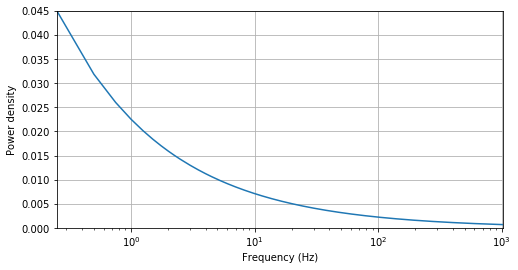

In [3]:
k  =  0.0225
n  =  0.5000

fs =  2048                     # samplig rate in Hz
N  =  8192                     # length of sample

M  =  N//2 + 1                 # length of periodogram
df =  fs/M                     # frequency step in Hz
f  =  np.linspace(0, fs/2, M)  # frequency axis in Hz
dt =  1/fs                     # time step in seconds
T  =  N*dt                     # series duration in seconds
t  =  np.linspace(0, T, N)     # time axis in seconds

Sx     =  np.zeros(M)
Sx[1:] =  k*f[1:]**(-n)         # avoiding singularity
Sx[0]  =  Sx[1]                 # repeating first valid number

# Visualization
plt.figure(1, figsize=(8,4))
plt.semilogx(f, Sx);
plt.xlim((f[1], fs/2));   plt.xlabel('Frequency (Hz)');
plt.ylim((0, Sx.max()));  plt.ylabel('Power density');
plt.grid(True)

# Check standard deviation
sX = np.sqrt(np.sum(Sx))*df
s0 = k*((fs/2)**(1-n))/(1-n)

print('Standard deviation from spectrum:{0:5.2f}'.format(sX))
print('Standard deviation theoretical:  {0:5.2f}'.format(s0))


Note that the exercise above is useful for calibrating the discretization
parameters in order to have a good accuracy of the standard deviation,
otherwise the process energy will no be correctly accounted for.


## 2. Time series simulation from periodogram


Standard deviation from simulation:  1.19


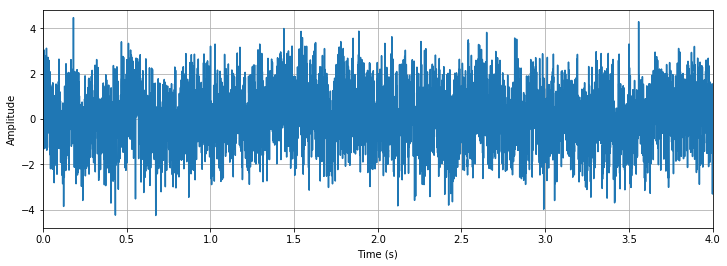

In [4]:
X1 = MRPy.from_periodogram(Sx, fs)
t  = X1.t_axis()

# Visualization
plt.figure(2, figsize=(12,4))
plt.plot(t, X1[0]);
plt.xlim((0, T));        plt.xlabel('Time (s)');
plt.ylim((-4*sX,4*sX));  plt.ylabel('Amplitude');
plt.grid(True)

# Check standard deviation
s1 = X1[0].std()

print('Standard deviation from simulation: {0:5.2f}'.format(s1))


## 3. Periodogram estimation from time series


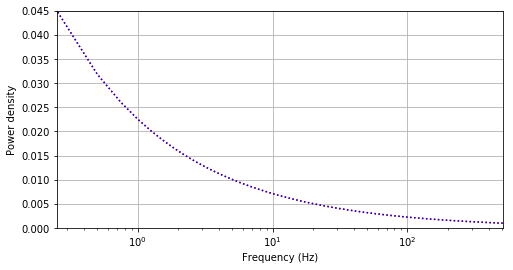

In [4]:
Sx0, fs0 = MRPy.periodogram(X1)
f = X1.f_axis()

# Visualization
plt.figure(3, figsize=(8,4))
plt.semilogx(f, Sx, 'r:', f, Sx0[0], 'b:');
plt.xlim((f[1], fs/2));      plt.xlabel('Frequency (Hz)');
plt.ylim((0, Sx.max()));  plt.ylabel('Power density');
plt.grid(True)


Observe the good accuracy in recovering the spectral density originally defined!


## 4. Autocovariance estimation from time series


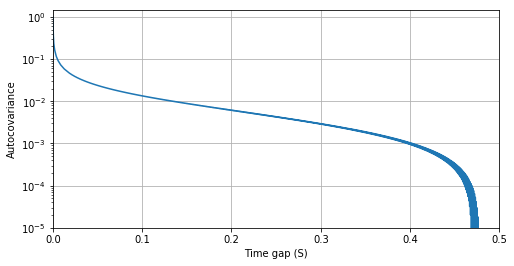

In [5]:
Cx, Tm = MRPy.autocorr(X1)
tm     = X1.T_axis()

# Visualization
plt.figure(4, figsize=(8,4))
plt.semilogy(tm, Cx[0]);
plt.xlim((0, Tm/4));      plt.xlabel('Time gap (S)');
plt.ylim((1e-5, sX**2));  plt.ylabel('Autocovariance');
plt.grid(True)


## 5. Time series simulation from autocovariance


Standard deviation from simulation:  1.00


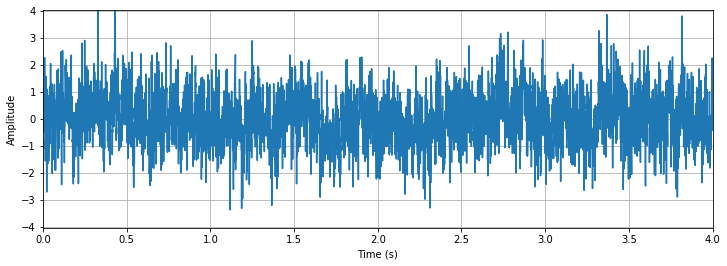

In [6]:
X2 = MRPy.from_autocov(Cx, Tm)
t  = X2.t_axis()

# Visualization
plt.figure(5, figsize=(12,4))
plt.plot(t, X2[0]);
plt.xlim((0, T));        plt.xlabel('Time (s)');
plt.ylim((-4*sX,4*sX));  plt.ylabel('Amplitude');
plt.grid(True)

# Check standard deviation
s2 = X2[0].std()

print('Standard deviation from simulation: {0:5.2f}'.format(s2))
